<a href="https://colab.research.google.com/github/Yan4S/DataAnalysis/blob/main/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /content/DataAnalysis
!git clone https://github.com/Yan4S/DataAnalysis.git

Cloning into 'DataAnalysis'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 212 (delta 21), reused 0 (delta 0), pack-reused 167 (from 1)
Receiving objects: 100% (212/212), 1.20 MiB | 16.80 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
folderPath = 'DataAnalysis/Kaggle/'
!ls DataAnalysis/Kaggle

house_describe.txt  README.md			   Titanic_train.csv
house_test.csv	    Titanic_gender_submission.csv
house_train.csv     Titanic_test.csv


## Step 1: Data Understanding, Exploration (general)

* (1-1) Load Data
* (1-2) Undertsnad if Numerical-Categorical conversion is needed (both Train and Test)
* (1-3) Initial General Visualization (prep for DataPreprocessing)

In [3]:
import DataAnalysis.utils.DataExplore as EDA

#### (1-1) Load Data

In [4]:
dTrain_raw = pd.read_csv(folderPath + 'house_train.csv')
dTest_raw = pd.read_csv(folderPath + 'house_test.csv')
dTrain_raw.shape, dTest_raw.shape

((1460, 81), (1459, 80))

#### (1-2) Understand Num & Cat

In [5]:
# col = 'YrSold'
# X_train_raw[col].info()
# X_train_raw[col].plot()

In [6]:
X_train_raw = dTrain_raw.drop(columns=['SalePrice'])
y_train = dTrain_raw['SalePrice']
X_test_raw = dTest_raw

# typeAnalyzer = EDA.FeatureTypeAnalyzer()
# typeAnalyzer.display_analysis_report(X_train_raw)

# # Get specific recommendations
# recommendations = typeAnalyzer.get_conversion_recommendations()

# # 2. See specific recommendations
# recommendations = typeAnalyzer.get_conversion_recommendations()
# print("Suggested conversions to categorical:", recommendations['convert_to_categorical'])
# print("Suggested conversions to numeric:", recommendations['convert_to_numeric'])

# # 3. YOU decide what to convert
convert_to_cat = ['Id', 'MSSubClass', 'MoSold' ]  # Your choice
convert_to_num = []      # Your choice

X_train_typeConv = EDA.typeConversion(X_train_raw, convert_to_cat, convert_to_num)
X_test_typeConv = EDA.typeConversion(dTest_raw, convert_to_cat, convert_to_num)
display(HTML(X_train_typeConv.describe().to_html()))
num_feas = X_train_typeConv.select_dtypes(include=[np.number]).columns
cat_feas = X_train_typeConv.select_dtypes(exclude=[np.number]).columns
print(f'Numerical Feasures (#={len(num_feas)}:\n {num_feas})')
print(f'Categorical Features(#={len(cat_feas)}:\n {cat_feas})')

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000


Numerical Feasures (#=34:
 Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold'],
      dtype='object'))
Categorical Features(#=46:
 Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinTyp

#### (1-3) Visualize

In [19]:
import pandas as pd
import numpy as np
from typing import List, Dict, Optional
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import logging
import warnings

logging.basicConfig(level=logging.INFO, format='%(message)s')
warnings.filterwarnings('ignore')

def plot_numeric_features(X: pd.DataFrame, plot_type: str = 'histogram', ncols: int = 5, col_names: Optional[List[str]] = None):
      """plot_type: 'histogram', 'boxplot', 'density', 'violin"""

      if col_names is None:
          numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
      else:
          numeric_cols = [col for col in col_names if col in X.columns and pd.api.types.is_numeric_dtype(X[col])]
      print(numeric_cols)

      if not numeric_cols:
          logging.info("No numeric columns found")
          return

      n_features = len(numeric_cols)
      nrows = (n_features + ncols - 1) // ncols

      fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3))
      axes_flat = axes.flatten() if nrows * ncols > 1 else [axes]
      print(axes_flat)

      for i, col in enumerate(numeric_cols):
          if i < len(axes_flat):
              ax = axes_flat[i]

              if plot_type == 'histogram':
                  sns.histplot(data=X, x=col, ax=ax, kde=True)
                  ax.set_title(f'{col}')
              elif plot_type == 'boxplot':
                  sns.boxplot(data=X, y=col, ax=ax)
                  ax.set_title(f'{col}')
              elif plot_type == 'density':
                  sns.kdeplot(data=X, x=col, ax=ax, fill=True)
                  ax.set_title(f'{col}')
              elif plot_type == 'violin':
                  sns.violinplot(data=X, y=col, ax=ax)
                  ax.set_title(f'{col}')

      # Hide empty subplots
      for i in range(len(numeric_cols), len(axes_flat)):
          axes_flat[i].set_visible(False)

      plt.tight_layout()
      plt.show()

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']
[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: >]


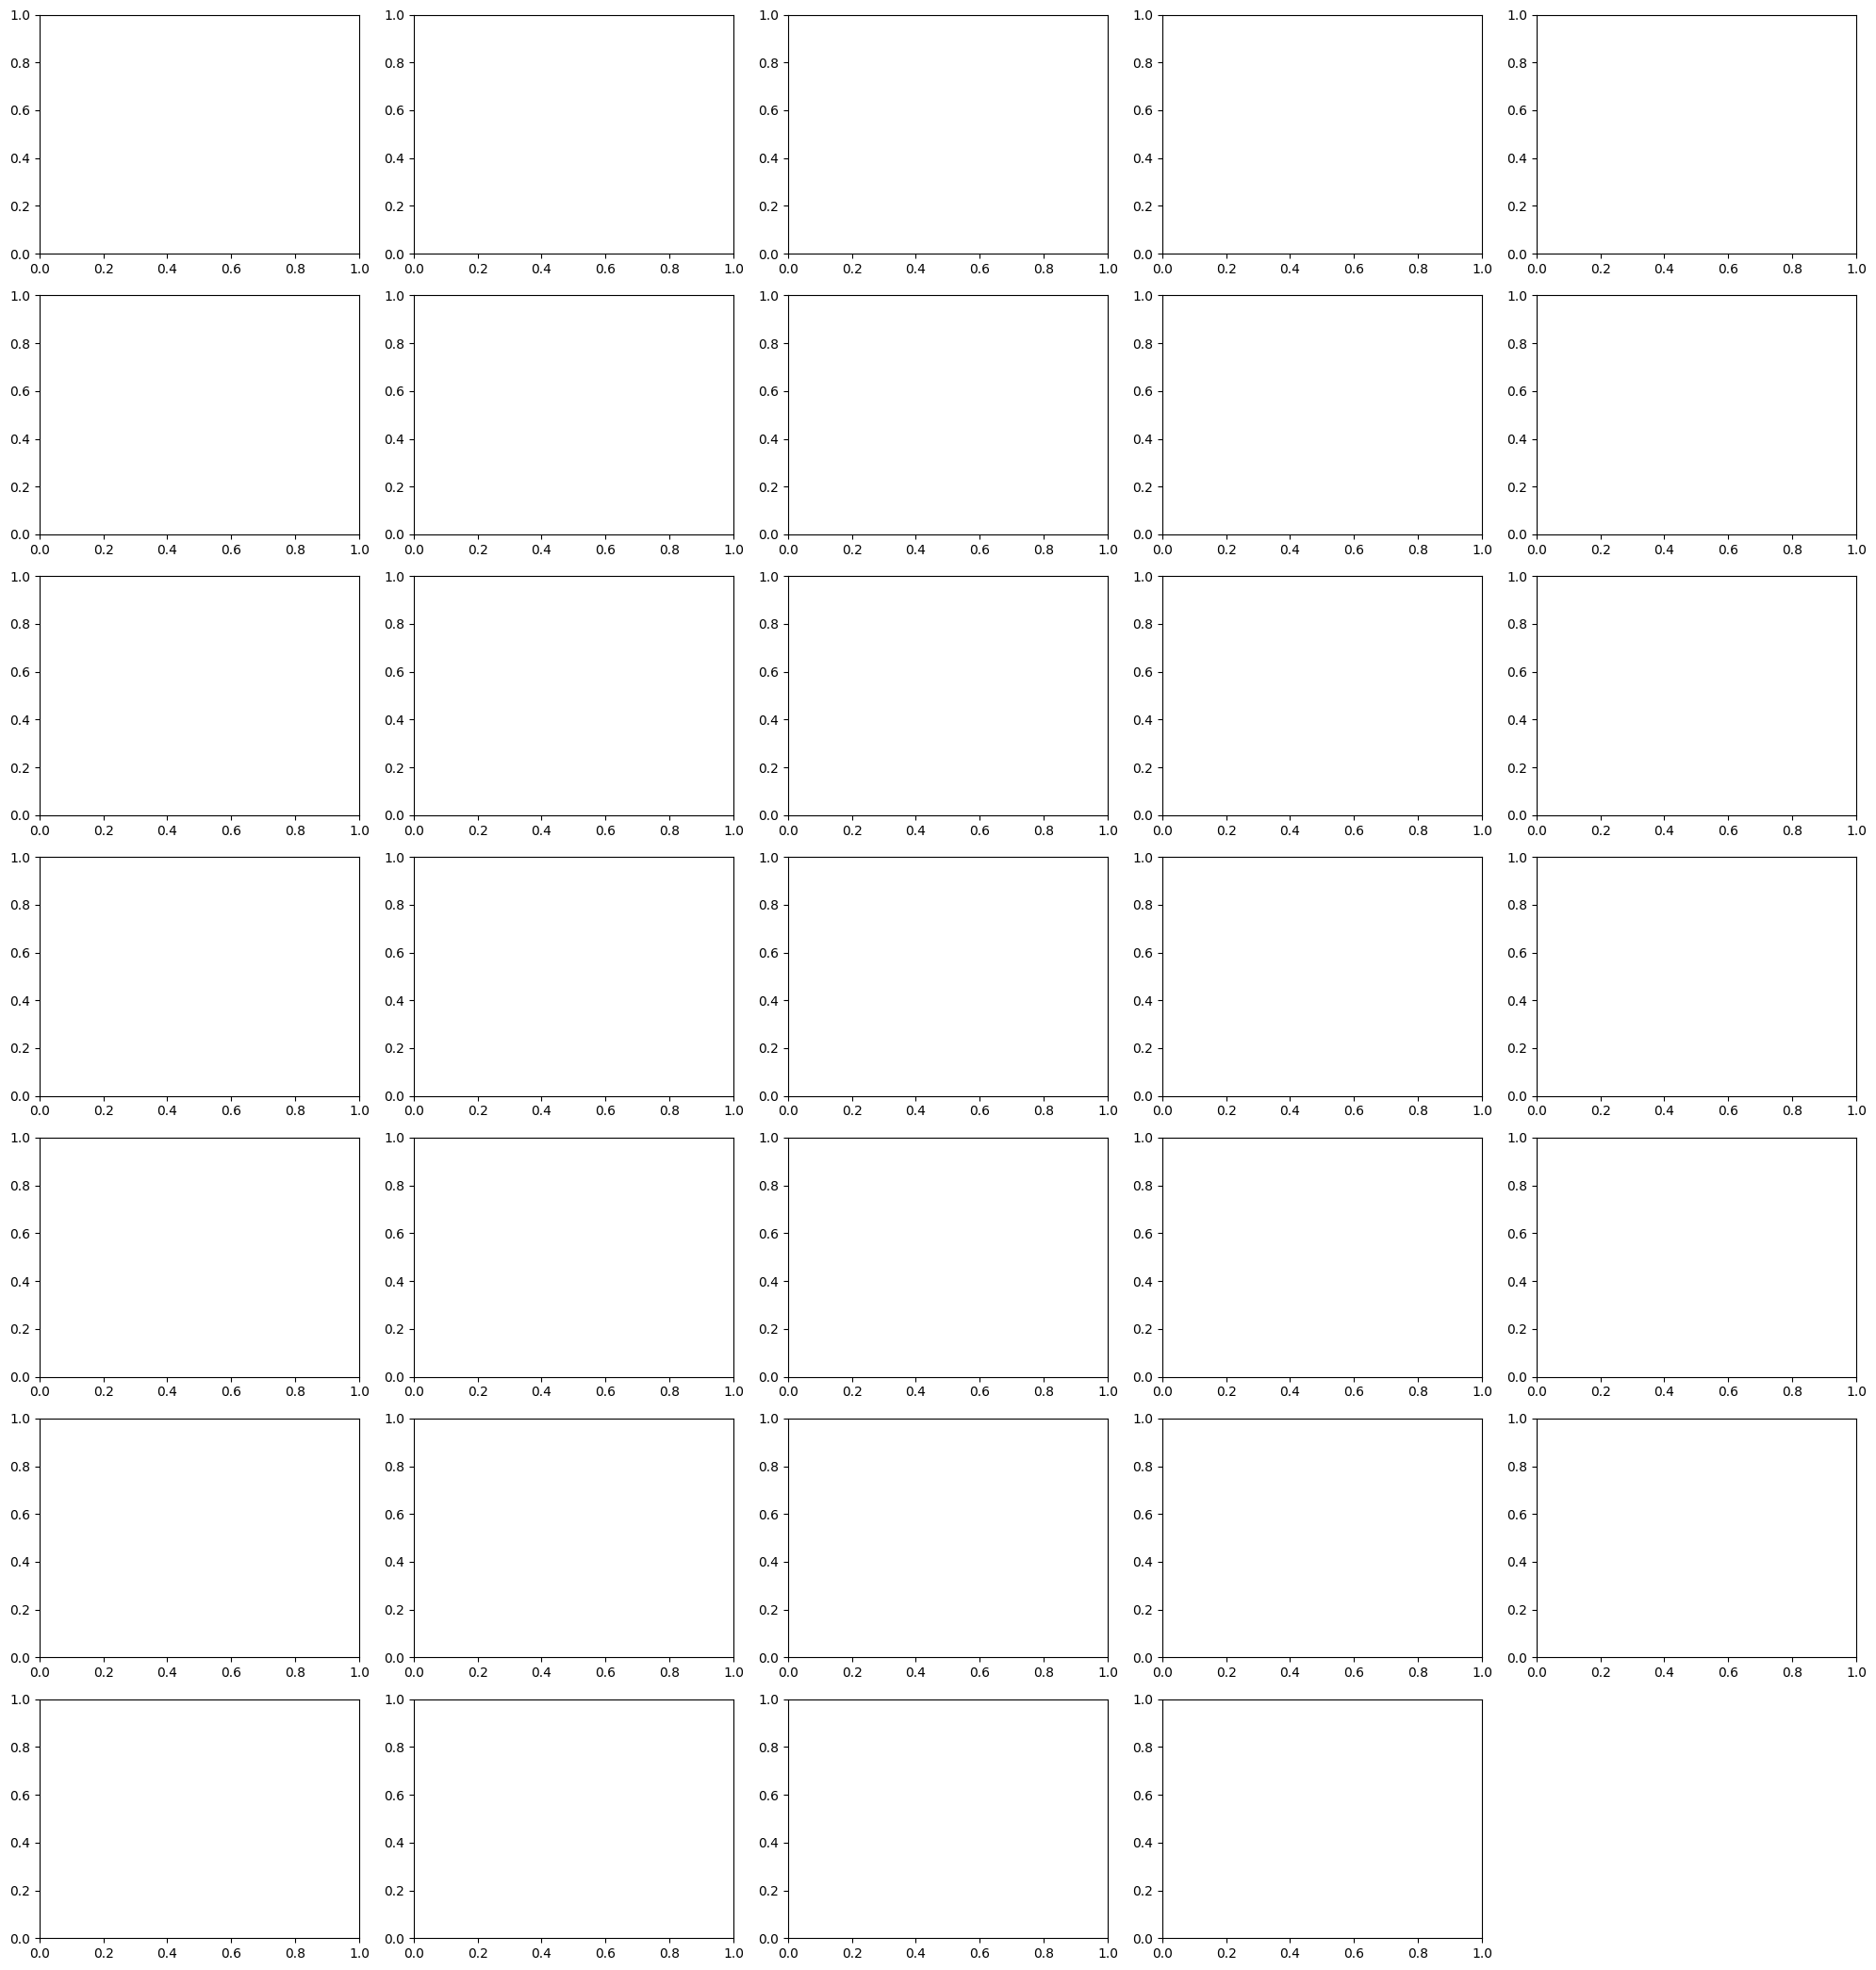

In [20]:
plot_numeric_features(X_test_typeConv, plot_type='hist', ncols=5, col_names=None)

## Step 2: Feature

In [ ]:
sns.scatter()